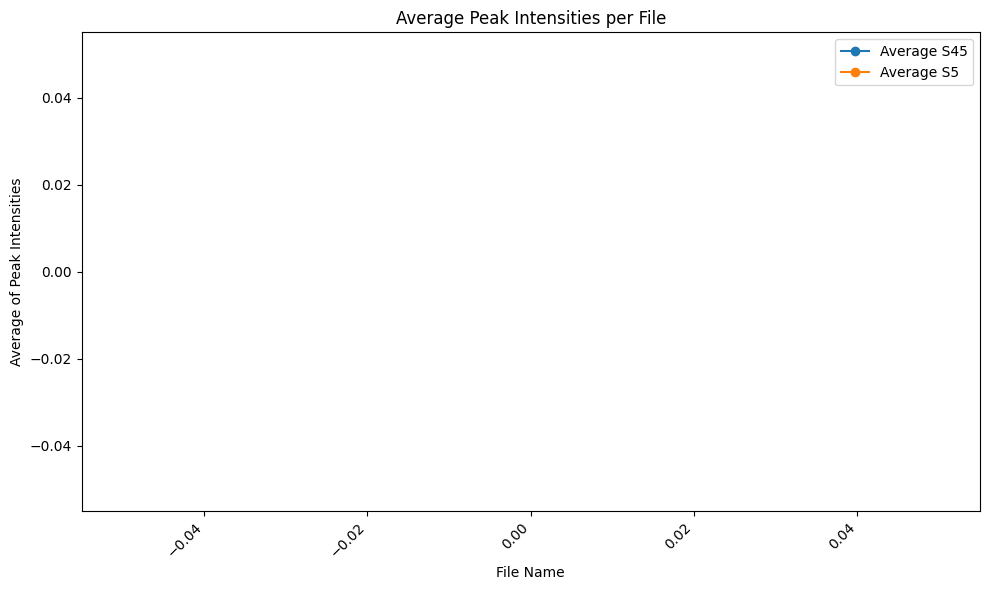

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define the interval of values parameter (changeable)
interval_of_values = 500  # Adjust this as needed

def process_csv_files(folder_path, interval):
    results = []

    # Get all CSV files in the specified folder
    csv_files = glob.glob(f"{folder_path}/*.csv")

    for file in csv_files:
        # Read the CSV file
        df = pd.read_csv(file)

        # Locate intensity columns
        if 'intensity[S45]' in df.columns and 'intensity[S5]' in df.columns:
            # Find maximum value within each interval
            max_values_s45 = df['intensity[S45]'].rolling(window=interval).max().dropna().values
            max_values_s5 = df['intensity[S5]'].rolling(window=interval).max().dropna().values
            
            # Calculate the average of max values for each column separately
            avg_max_s45 = max_values_s45.mean()
            avg_max_s5 = max_values_s5.mean()
            
            # Store results as a tuple with file name and separate averages
            results.append((file, avg_max_s45, avg_max_s5))

    return results

def save_results_to_csv(results, output_folder):
    # Create the output folder if it does not exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Define the path for the output CSV file
    output_file = os.path.join(output_folder, 'averaged_values.csv')
    
    # Save the averaged values to a CSV file with separate columns for S45 and S5
    df = pd.DataFrame(results, columns=['File Name', 'Average S45', 'Average S5'])
    df.to_csv(output_file, index=False)

def plot_results(results):
    # Extract only the file names and average values for plotting
    file_names = [os.path.basename(result[0]) for result in results]
    avg_values_s45 = [result[1] for result in results]
    avg_values_s5 = [result[2] for result in results]

    # Plot results for intensity[S45]
    plt.figure(figsize=(10, 6))
    plt.plot(file_names, avg_values_s45, marker='o', label='Average S45')
    
    # Plot results for intensity[S5]
    plt.plot(file_names, avg_values_s5, marker='o', label='Average S5')
    
    plt.xlabel('File Name')
    plt.ylabel('Average of Peak Intensities')
    plt.title('Average Peak Intensities per File')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to process and plot
def main():
    folder_path = r"C:\Users\thaim\Downloads\lens compare\lens compare\1sphere\source"  # Path to your CSV files
    
    # Define the output folder within the input folder
    output_folder = os.path.join(folder_path, 'output_results')
    
    # Process the files
    results = process_csv_files(folder_path, interval_of_values)

    # Save to CSV in the specified output folder
    save_results_to_csv(results, output_folder)
    
    # Plot results
    plot_results(results)

if __name__ == '__main__':
    
    main()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define the interval of values parameter (changeable)
interval_of_values = 500  # Adjust this as needed

def process_excel_files(folder_path, interval):
    results = []

    # Get all Excel files in the specified folder
    excel_files = glob.glob(f"{folder_path}/*.xlsx")

    for file in excel_files:
        # Read the Excel file
        df = pd.read_excel(file)

        # Locate intensity columns
        if 'intensity[S45]' in df.columns and 'intensity[S5]' in df.columns:
            # Find maximum value within each interval
            max_values_s45 = df['intensity[S45]'].rolling(window=interval).max().dropna().values
            max_values_s5 = df['intensity[S5]'].rolling(window=interval).max().dropna().values
            
            # Calculate the average of max values for each column separately
            avg_max_s45 = max_values_s45.mean()
            avg_max_s5 = max_values_s5.mean()
            
            # Store results as a tuple with file name and separate averages
            results.append((file, avg_max_s45, avg_max_s5))

    return results

def save_results_to_excel(results, output_folder):
    # Create the output folder if it does not exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Define the path for the output Excel file
    output_file = os.path.join(output_folder, 'averaged_values.xlsx')
    
    # Save the averaged values to an Excel file with separate columns for S45 and S5
    df = pd.DataFrame(results, columns=['File Name', 'Average S45', 'Average S5'])
    df.to_excel(output_file, index=False)

def plot_results(results):
    # Extract only the file names without path and ".xlsx" extension
    file_names = [os.path.basename(result[0]).replace('.xlsx', '') for result in results]
    avg_values_s45 = [result[1] for result in results]
    avg_values_s5 = [result[2] for result in results]

    # Normalize values to the range 0-1
    max_s45 = max(avg_values_s45)
    max_s5 = max(avg_values_s5)
    normalized_s45 = [val / max_s45 for val in avg_values_s45]
    normalized_s5 = [val / max_s5 for val in avg_values_s5]

    # Plot results for intensity[S45]
    plt.figure(figsize=(10, 6))
    plt.plot(file_names, normalized_s45, marker='o', label='Normalized S45')
    
    # Plot results for intensity[S5]
    plt.plot(file_names, normalized_s5, marker='o', label='Normalized S5')
    
    plt.xlabel('File Name')
    plt.ylabel('Normalized Average of Peak Intensities')
    plt.title('Normalized Average Peak Intensities per File')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)  # Set Y-axis to be from 0 to 1
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main function to process and plot
def main():
    folder_path = r"C:\Users\thaim\Downloads\א-ספרית 50 מטר"  # Path to your Excel files
    
    # Define the output folder within the input folder
    output_folder = os.path.join(folder_path, 'output_results')
    
    # Process the files
    results = process_excel_files(folder_path, interval_of_values)

    # Save to Excel in the specified output folder
    save_results_to_excel(results, output_folder)
    
    # Plot results
    plot_results(results)

if __name__ == '__main__':
    main()



ValueError: max() iterable argument is empty